# linear regression

## import

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import train
from srcs.functions import normalize, predict, predict_int, cost, fit, set_theta_after_norm
from srcs.files import get_theta_in_args, check_theta, export_theta, import_data

## plot functions

In [3]:
def plot_point_and_line(X, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(y), max(y)])
    ax.scatter(X, y, marker='.')
    line_x = np.linspace(min(X), max(X), 100)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y, 'r-')
    plt.show()

In [4]:
def plot_cost(J_history):
    fit_ = plt.figure()
    ax = plt.axes()
    ax.plot(J_history)

In [5]:
def predict_and_plot(predict_data, X, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(y), max(y)])
    ax.scatter(X, y, marker='.')
    line_x = np.linspace(min(X), max(X), 100)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y, 'r-')
    ax.scatter(predict_data, predict(predict_data, theta), c='r', marker='o')
    plt.show()

## import data

In [6]:
data, X, y = import_data(train.all_args)

In [7]:
data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


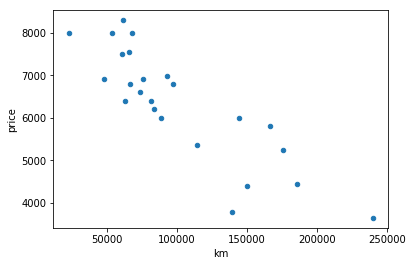

In [8]:
data.plot.scatter('km', 'price')

## increase data
with pre-calculated value, we a create a fake dataset bigger than the default dataset

In [9]:
def create_dataset(theta, km_min, km_max, price_precision, nb_data):
    """
    price precision = [nb, exp]
    we add random(0, nb)**exp + random(0, nb)**(exp-1)+ ... + random(0, nb)
    """
    X = np.array([random.randint(km_min, km_max) for i in range(nb_data)])
    y = np.array(predict(X, theta))
    for i in range(nb_data):
        add = 0
        for j in range(1, price_precision[1]+1):
            add += random.randint(0, price_precision[0])**j
        if random.random() < 0.5:
            y[i] -= add
        else:
            y[i] += add
    return X, y

In [10]:
def generate_and_plot(nb_data):
    data, def_X, def_y = import_data(train.all_args)  # import data from dataset
    theta = [8499.599351317247, -0.021448960751781]  # theta calculate with the 20 data in the dataset
    
    # possible values for price_precision: [1800, 1] || [40, 2] || [12, 3] || [6, 4]
    X, y = create_dataset(theta=theta, km_min=min(def_X), km_max=max(def_X), price_precision=[12, 3], nb_data=nb_data)

    plt.scatter(X, y, c='r', marker='.')
    plt.scatter(def_X, def_y, marker='.')
    linex = np.linspace(min(def_X), max(def_X), 30, endpoint=True)
    liney = theta[0] + theta[1] * linex
    plt.plot(linex, liney)
    return X, y

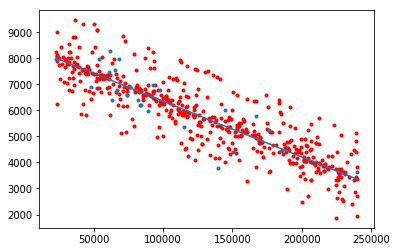

In [11]:
X, y = generate_and_plot(500)

## linear regression

### normalize data

In [12]:
norm_X = normalize(X)
print('X')
print(X[:10])
print('X normalized (all values btw 0 and 1)')
print(norm_X[:10])

X
[135173 167584 113371 104620 209664 139075  38258 160009  61806 133809]
X normalized (all values btw 0 and 1)
[0.51694328 0.66661587 0.4162626  0.37585086 0.86093948 0.53496255
 0.06939403 0.63163485 0.17813767 0.51064439]


### fit and save the cost

In [13]:
# this  function find the theta for normalized parameter (btw 0 and 1)
theta, J_history = fit(norm_X, y, [0, 0], 0.1, 3000, auto_stop=True)

[*]  auto stopped at 2286 iterations


### update theta

In [14]:
# the theta is calculated with normalized data so we need to update it
print('theta before:', theta)
theta = set_theta_after_norm(X, theta)
print('theta after:', theta)

theta before: [7983.673559079661, -4520.764449676504]
theta after: [8468.660023528022, -0.020876693403140693]


### plot result

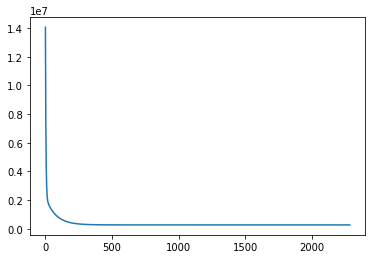

In [15]:
plot_cost(J_history)

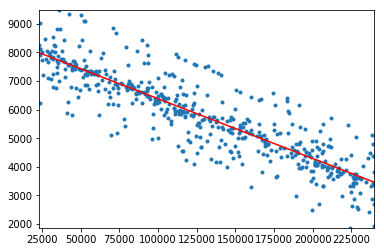

In [16]:
plot_point_and_line(X, y, theta)

## predict result

In [27]:
predict(200000, theta, predict_method=predict_int)

4293

In [28]:
predict(np.array([123000, 56000]), theta, predict_method=predict_int)

array([5900, 7299])

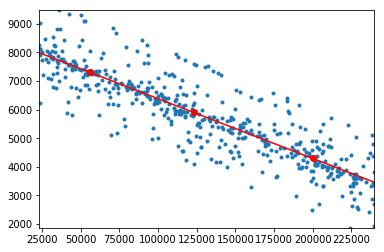

In [19]:
predict_and_plot(np.array([123000, 56000, 200000]), X, y, theta)

## Analyse

In [20]:
# we define a step to sort data (for example: all data btw -20 and 20, 20 and 60, ... if the step is 40)
step_size = 200

In [21]:
all_cost = np.array(predict(X, theta) - y, int)
end = (max(abs(all_cost)) - (step_size >> 1)) // step_size * step_size + step_size
start = -end

In [22]:
counter_diff = np.array([[i, 0] for i in range(start, end+1, step_size)])
for unique_cost in all_cost:
    ok = 0
    for i in range(len(counter_diff)):
        if unique_cost >= counter_diff[i][0] - (step_size >> 1) and unique_cost < counter_diff[i][0] + (step_size >> 1):
            counter_diff[i][1] += 1
            ok = 1
            break
    if not ok:
        print('[ERROR]:', unique_cost)

In [23]:
# standard deviation (ecart type)
std = np.sqrt(sum((all_cost - all_cost.mean()) ** 2) / len(all_cost))  # standard deviation

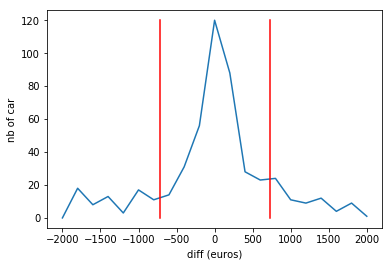

In [24]:
log_scale = False

min_ = min(counter_diff.transpose()[1])
max_ = max(counter_diff.transpose()[1])

plt.plot(*counter_diff.transpose())
plt.plot([std, std], [min_, max_], 'r-')
plt.plot([-std, -std], [min_, max_], 'r-')

plt.xlabel('diff (euros)')
plt.ylabel('nb of car')
if log_scale:
    plt.yscale('log')
    plt.title('error (log scale in y)')
    i = 1
    while i <= max_:
        if i >= min_:
            plt.annotate(str(i), xy = (0, i), xytext = (counter_diff[0][0], i))
        i *= 10